In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from ctapipe import io, visualization
import numpy as np
from ctapipe.utils.datasets import get_example_simtelarray_file
import astropy.units as u
from ipywidgets import interact

In [2]:
src=io.hessio.hessio_event_source(get_example_simtelarray_file())


evt=next(src)
evt=next(src)
tels=list(evt.dl0.tels_with_data)

#for evt in src:
#    print(evt)

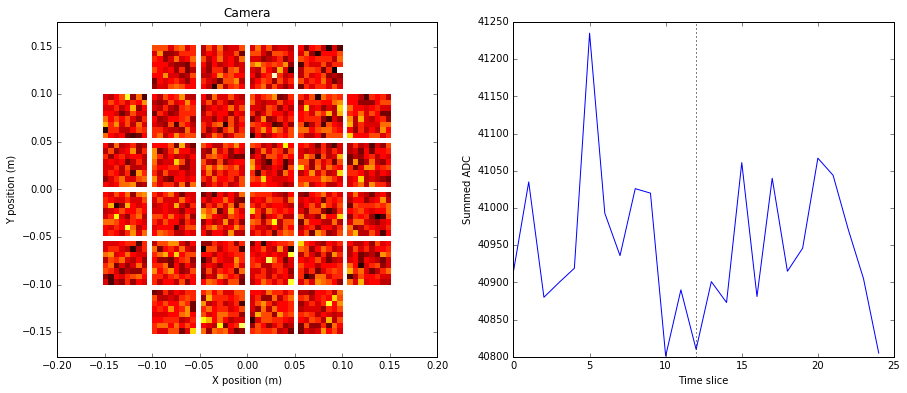

In [3]:
def plot_evt(t,tel_id):
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,6))
    
    cube=evt.dl0.tel[int(tel_id)].adc_samples[0]
#    tel_id = list(evt.dl0.tels_with_data)[0]
    x, y = evt.meta.pixel_pos[int(tel_id)]
    geom = io.CameraGeometry.guess(x, y, 2.3*u.meter)
    disp = visualization.CameraDisplay(geom,ax=ax1)
    disp.image = cube[:,t]
    disp.update()

    ax2.plot( np.sum(cube,axis=0) )
    ax2.axvline(t,ls=':',color='k')
    ax2.set_ylabel('Summed ADC')    
    ax2.set_xlabel('Time slice')
    plt.show()

interact(plot_evt,t=(0,24,1),tel_id=tels)

## Easy code profiling
Line profiler in Jupyter:

````
git clone https://github.com/caethan/line_profiler.git
cd line_profiler/
python setup.py install
```
Be sure to clone from the caethan repo as a bug fix as not been merged to master.
Restart your notebook.

Then load the plugin with %load_ext

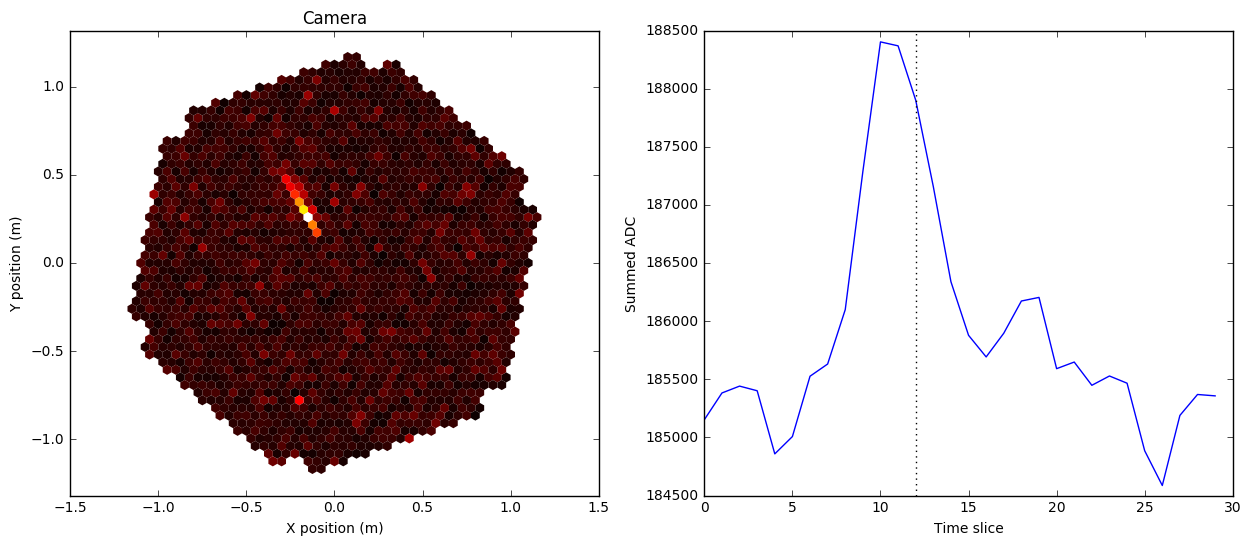

In [4]:
%load_ext line_profiler
%lprun -f plot_evt plot_evt(12,11)